The following dataset is from the KDD Cup 2010 Educational Data Mining Challenge. It is from an Intelligent Tutoring System (ITS) called Bridge to Algebra and contains data from **6043 students** over a full year semester **(2008-09-06 to 2009-06-26)**.

In [1]:
%matplotlib inline

from SummaryStats import SummaryStats
import pandas as pd
import numpy as np
import graphing_util as gu
import loading_util as lu

In [2]:
#load data from pickle
raw_data = lu.load_pickle('/Users/qipanda/Documents/2017_Thesis/education_data'+\
        '/bridge_to_algebra_2008_2009')

#create SummaryStats object with Dataframe
SS = SummaryStats(raw_data)

GroupBy: ['Anon Student Id']  uniquely counting: ['Problem Name'] complete
plotting Number of Students that have Attempted x prct. Unique Problems


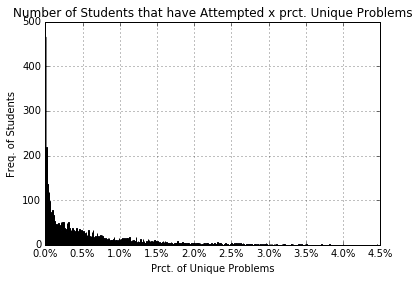

plot closed


In [3]:
#Plot 1.1, hist: number of students that have attempted x unique problems
title = 'Number of Students that have Attempted x prct. Unique Problems'
xlabel = 'Prct. of Unique Problems'
ylabel = 'Freq. of Students'
prct_cnt_bins = 0.10
prct_x_axis = True
cnt_result = SS.grpby_cntdist_prct(['Anon Student Id'], ['Problem Name'])

gu.pd_dseries_hist(cnt_result, xlabel, ylabel, title, prct_cnt_bins, prct_x_axis)

GroupBy: ['Anon Student Id']  uniquely counting: ['Problem Name', 'Step Name'] complete
plotting Number of Students that have Attempted x prct. Unique Steps


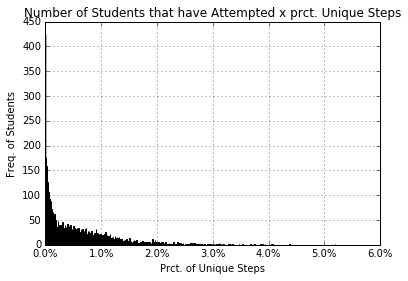

plot closed


In [4]:
#Plot 1.2, hist: number of students that have attempted x unique steps
#this is given by problem-step combinations
title = 'Number of Students that have Attempted x prct. Unique Steps'
xlabel = 'Prct. of Unique Steps'
ylabel = 'Freq. of Students'
prct_cnt_bins = 0.10
prct_x_axis = True
agg_dseries = SS.grpby_cntdist_prct(['Anon Student Id'], ['Problem Name', 'Step Name'])

gu.pd_dseries_hist(agg_dseries, xlabel, ylabel, title, prct_cnt_bins, prct_x_axis)

GroupBy: ['Anon Student Id']  averaging: ['Correct First Attempt'] complete
plotting Number of Students that have x prct. Average Accuracy per Step


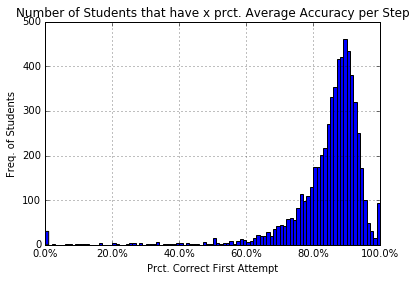

plot closed


In [5]:
#Plot 2.1, hist: number of students that have x accuracy on all steps attempted
agg_dseries = SS.grpby_avg(['Anon Student Id'], ['Correct First Attempt'])
title = 'Number of Students that have x prct. Average Accuracy per Step'
xlabel = 'Prct. Correct First Attempt'
ylabel = 'Freq. of Students'
prct_x_axis = True
prct_cnt_bins = (1.0/agg_dseries.shape[0])*100 #want 100 bins for this one

gu.pd_dseries_hist(agg_dseries, xlabel, ylabel, title, prct_cnt_bins, prct_x_axis)

plotting Number of KCs that have been Attempted by x prct. of Students


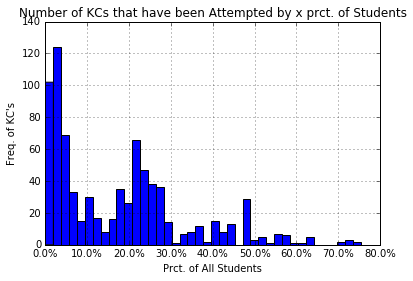

plot closed


In [8]:
#Plot 4.1, hist: number of KC's that have been attempted by x prct. of students
title = 'Number of KCs that have been Attempted by x prct. of Students'
xlabel = 'Prct. of All Students'
ylabel = 'Freq. of KC\'s'
prct_cnt_bins = 0.05
prct_x_axis = True
cnt_result = SS.split_stack_cntdist_prct('KC(KTracedSkills)', '~~', ['Anon Student Id'])

gu.pd_dseries_hist(cnt_result, xlabel, ylabel, title, prct_cnt_bins, prct_x_axis)

For testing, pick all questions that contain a step using the KC with the most student "coverage" from the above figure 

In [9]:
cnt_result.sort_values(ascending=False)

KC(KTracedSkills)
Calculate sum digit -- no carry-1                         0.753930
Identify operator-1                                       0.750952
Calculate difference digit from 2 digits-1                0.729274
Calculate difference digit -- no borrow-1                 0.728777
Calculate sum digit from 2 digits-1                       0.726957
Calculate difference digit from 1 digit-1                 0.712560
Calculate sum digit from 1 digit-1                        0.710905
Calculate sum digit -- carry out-1                        0.640079
Calculate sum digit -- carry in-1                         0.640079
Calculate difference digit -- borrow in-1                 0.634122
Calculate difference digit -- borrow out-1                0.633626
Calculate sum digit -- carry in and out-1                 0.632633
Calculate difference digit -- borrow in and out-1         0.620553
Enter quantity from diagram by reading-1                  0.585967
Identify larger quantity -- multiplication-1

In [10]:
SS.df['KC(KTracedSkills)'].str.contains('Calculate sum digit -- no carry-1', na=False).sum()

403848

Subset of data for testing will be all problems contain the KC **'Calculate sum digit -- no carry-1'**